# 🦖 NEAT Training for Chrome Dino Game

**NEAT** = NeuroEvolution of Augmenting Topologies

### Network Architecture: 12 inputs → 2 outputs
| Layer | Nodes | Description |
|-------|-------|-------------|
| **Inputs** | 12 | Obstacle 1 (5), Obstacle 2 (3), Dino State (4) |
| **Outputs** | 2 | JUMP, DUCK (RUN is automatic/default) |

### Inputs Detail
| # | Input | Description |
|---|-------|-------------|
| 0-4 | **Obstacle 1** | Distance, Width, Height, Y, Is_Bird |
| 5-7 | **Obstacle 2** | Distance, Height, Is_Bird |
| 8-11 | **Dino State** | Y position, Velocity, Speed, Is_Ducking |

### Rewards
| Reward | Points |
|--------|--------|
| Obstacle passed | +10 |
| Survival (per frame) | +0.1 |
| Per 100 score | +12 |
| Per 500 score | +15 |

In [1]:
# ═══════════════════════════════════════════════════════════════════════════════
# 1. 📦 IMPORTS & SETUP
# ═══════════════════════════════════════════════════════════════════════════════
import os, sys, pickle, importlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sys.path.append(os.path.join(os.getcwd(), 'src'))
import neat
import neat_trainer
importlib.reload(neat_trainer)
from neat_trainer import create_config_file, NEATTrainer, NEATVisualTester

os.makedirs('models_state', exist_ok=True)
os.makedirs('plots_state', exist_ok=True)
print("✅ Imports loaded!")

pygame 2.6.1 (SDL 2.28.4, Python 3.11.14)
Hello from the pygame community. https://www.pygame.org/contribute.html
✅ Imports loaded!


c:\Users\IC1807\anaconda3\envs\DINO_TF\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [ ]:
# ═══════════════════════════════════════════════════════════════════════════════
# 2. ⚙️ CONFIGURATION - EDIT THESE VALUES!
# ═══════════════════════════════════════════════════════════════════════════════

POPULATION_SIZE = 200      # Dinos per generation
GENERATIONS = 1          # Generations to train

# Create config file with specified population size
config_path = create_config_file("neat_config.txt", population_size=POPULATION_SIZE)
print(f"⚙️ Pop: {POPULATION_SIZE} | Gens: {GENERATIONS}")

✓ NEAT config created: neat_config.txt
⚙️ Pop: 200 | Gens: 1


## 3. 🆕 Fresh Training (Start from Scratch)

Deletes all previous models and starts training from a blank population.

In [8]:
# ═══════════════════════════════════════════════════════════════════════════════
# 3. 🆕 FRESH TRAINING (Start from Scratch)
# ═══════════════════════════════════════════════════════════════════════════════
from datetime import datetime
import shutil

# Create prev_models folder
os.makedirs('prev_models', exist_ok=True)

# Move old models to prev_models (instead of deleting)
old_files = ['models_state/neat_winner.pkl', 
             'models_state/neat_interrupted.pkl',
             'models_state/neat_checkpoint.pkl',
             'models_state/neat_stats.pkl']

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
print("📦 Backing up old models to prev_models/...")
for f in old_files:
    if os.path.exists(f):
        filename = os.path.basename(f)
        backup_name = f"prev_models/{timestamp}_{filename}"
        shutil.move(f, backup_name)
        print(f"   Moved: {f} → {backup_name}")

print(f"\n🆕 Starting FRESH Training - {GENERATIONS} generations")
print("="*60)

# Reload module to get latest code
importlib.reload(neat_trainer)
from neat_trainer import NEATTrainer

# Create trainer from scratch
trainer = NEATTrainer("neat_config.txt", render=True)

try:
    winner = trainer.run(generations=GENERATIONS)
    
    # Save winner
    trainer.save_winner('models_state/neat_winner.pkl', winner)
    trainer.save_checkpoint('models_state/neat_checkpoint.pkl')
    
    # Save stats
    with open('models_state/neat_stats.pkl', 'wb') as f:
        pickle.dump({
            'best_scores': trainer.gen_best_scores,
            'avg_scores': trainer.gen_avg_scores,
            'generations': trainer.generation
        }, f)
    
    print(f"\n🏆 Training Complete!")
    print(f"   Winner Fitness: {winner.fitness:.0f}")
    print(f"   Best Ever: {trainer.best_fitness:.0f}")

except KeyboardInterrupt:
    print("\n⚠️ Training interrupted!")
    if trainer.best_genome:
        trainer.save_winner('models_state/neat_winner.pkl', trainer.best_genome)
        trainer.save_checkpoint('models_state/neat_checkpoint.pkl')
        with open('models_state/neat_stats.pkl', 'wb') as f:
            pickle.dump({
                'best_scores': trainer.gen_best_scores,
                'avg_scores': trainer.gen_avg_scores,
                'generations': trainer.generation
            }, f)
        print(f"   Saved best (fitness: {trainer.best_fitness:.0f})")

finally:
    trainer.close()
    print("✅ Done")

📦 Backing up old models to prev_models/...
   Moved: models_state/neat_winner.pkl → prev_models/20251126_200000_neat_winner.pkl
   Moved: models_state/neat_checkpoint.pkl → prev_models/20251126_200000_neat_checkpoint.pkl
   Moved: models_state/neat_stats.pkl → prev_models/20251126_200000_neat_stats.pkl

🆕 Starting FRESH Training - 1 generations
✓ Loaded original Chrome Dino sprites!

🧬 Starting NEAT Evolution for 1 generations...
   Population: 250
   Inputs: 8 | Outputs: 3
✓ Loaded original Chrome Dino sprites!

🧬 Starting NEAT Evolution for 1 generations...
   Population: 250
   Inputs: 8 | Outputs: 3
  Gen   1 | Best:   747 | Avg:    16 | Best Ever:   747 | Species: 1 | 45.4s ⭐NEW BEST!

🏆 Evolution Complete!
   Best Fitness: 747
   Nodes: 2
   Connections: 24
✓ Winner saved to models_state/neat_winner.pkl
✓ Checkpoint saved to models_state/neat_checkpoint.pkl

🏆 Training Complete!
   Winner Fitness: 747
   Best Ever: 747
✅ Done
  Gen   1 | Best:   747 | Avg:    16 | Best Ever:   74

## 4. 🔄 Resume Training (Visual)

Continue training from your saved model with visualization.

In [3]:
# ═══════════════════════════════════════════════════════════════════════════════
# 4. 🔄 RESUME TRAINING (Visual)
# ═══════════════════════════════════════════════════════════════════════════════

# How many more generations?
RESUME_GENERATIONS = 50

# Find saved model
model_path = None
if os.path.exists('models_state/neat_winner.pkl'):
    model_path = 'models_state/neat_winner.pkl'
elif os.path.exists('models_state/neat_interrupted.pkl'):
    model_path = 'models_state/neat_interrupted.pkl'

if model_path:
    print(f"🔄 Resuming from: {model_path}")
    print(f"   Training {RESUME_GENERATIONS} more generations (visual)")
    print("="*60)
    
    # Reload module
    importlib.reload(neat_trainer)
    from neat_trainer import NEATTrainer
    
    trainer = NEATTrainer.from_winner(model_path, "neat_config.txt", render=True)
    
    try:
        winner = trainer.run(generations=RESUME_GENERATIONS)
        
        # Save
        trainer.save_winner('models_state/neat_winner.pkl', winner)
        trainer.save_checkpoint('models_state/neat_checkpoint.pkl')
        with open('models_state/neat_stats.pkl', 'wb') as f:
            pickle.dump({
                'best_scores': trainer.gen_best_scores,
                'avg_scores': trainer.gen_avg_scores,
                'generations': trainer.generation
            }, f)
        
        print(f"\n🏆 Training Complete!")
        print(f"   Total Generations: {trainer.generation}")
        print(f"   Winner Fitness: {winner.fitness:.0f}")
        print(f"   Best Ever: {trainer.best_fitness:.0f}")
    
    except KeyboardInterrupt:
        print("\n⚠️ Interrupted!")
        if trainer.best_genome:
            trainer.save_winner('models_state/neat_winner.pkl', trainer.best_genome)
            trainer.save_checkpoint('models_state/neat_checkpoint.pkl')
            with open('models_state/neat_stats.pkl', 'wb') as f:
                pickle.dump({
                    'best_scores': trainer.gen_best_scores,
                    'avg_scores': trainer.gen_avg_scores,
                    'generations': trainer.generation
                }, f)
            print(f"   Saved (fitness: {trainer.best_fitness:.0f})")
    
    finally:
        trainer.close()
        print("✅ Done")
else:
    print("❌ No saved model found! Run Fresh Training first.")

🔄 Resuming from: models_state/neat_winner.pkl
   Training 50 more generations (visual)
✓ Loaded original Chrome Dino sprites!
Mean genetic distance 1.631, standard deviation 0.585
✓ Loaded winner from: models_state/neat_winner.pkl
   Winner Fitness: 537
   Created 250 genomes (10% copies, 90% mutations)

🧬 Starting NEAT Evolution for 50 generations...
   Population: 250
   Inputs: 8 | Outputs: 3

 ****** Running generation 0 ****** 

✓ Loaded original Chrome Dino sprites!
Mean genetic distance 1.631, standard deviation 0.585
✓ Loaded winner from: models_state/neat_winner.pkl
   Winner Fitness: 537
   Created 250 genomes (10% copies, 90% mutations)

🧬 Starting NEAT Evolution for 50 generations...
   Population: 250
   Inputs: 8 | Outputs: 3

 ****** Running generation 0 ****** 

  Gen 1: Best=1102, Avg=17, Survived=0, Best Ever=1102
Population's average fitness: 17.17320 stdev: 70.16856
Best fitness: 1101.60000 - size: (5, 7) - species 1 - id 108
Average adjusted fitness: 0.009
Mean gen

## 5. 🚀 Resume Training (Headless - Faster!)

Continue training without visualization - much faster!

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════════
# 5. 🚀 RESUME TRAINING (Headless - FAST!)
# ═══════════════════════════════════════════════════════════════════════════════

# How many more generations? (can do more since it's faster!)
HEADLESS_GENERATIONS = 50
HEADLESS_POPULATION = 1000  # Number of dinos for headless training

# Find saved model
model_path = None
if os.path.exists('models_state/neat_winner.pkl'):
    model_path = 'models_state/neat_winner.pkl'
elif os.path.exists('models_state/neat_interrupted.pkl'):
    model_path = 'models_state/neat_interrupted.pkl'

if model_path:
    print(f"🚀 Headless Training from: {model_path}")
    print(f"   Population: {HEADLESS_POPULATION} | Generations: {HEADLESS_GENERATIONS}")
    print("="*60)
    
    # Reload module
    importlib.reload(neat_trainer)
    from neat_trainer import NEATTrainer, create_config_file
    
    # Recreate config with headless population size
    create_config_file("neat_config.txt", population_size=HEADLESS_POPULATION)
    
    trainer = NEATTrainer.from_winner(model_path, "neat_config.txt", render=False)
    
    try:
        winner = trainer.run(generations=HEADLESS_GENERATIONS)
        
        # Save
        trainer.save_winner('models_state/neat_winner.pkl', winner)
        trainer.save_checkpoint('models_state/neat_checkpoint.pkl')
        with open('models_state/neat_stats.pkl', 'wb') as f:
            pickle.dump({
                'best_scores': trainer.gen_best_scores,
                'avg_scores': trainer.gen_avg_scores,
                'generations': trainer.generation
            }, f)
        
        print(f"\n🏆 Headless Training Complete!")
        print(f"   Total Generations: {trainer.generation}")
        print(f"   Winner Fitness: {winner.fitness:.0f}")
        print(f"   Best Ever: {trainer.best_fitness:.0f}")
    
    except KeyboardInterrupt:
        print("\n⚠️ Interrupted!")
        if trainer.best_genome:
            trainer.save_winner('models_state/neat_winner.pkl', trainer.best_genome)
            trainer.save_checkpoint('models_state/neat_checkpoint.pkl')
            with open('models_state/neat_stats.pkl', 'wb') as f:
                pickle.dump({
                    'best_scores': trainer.gen_best_scores,
                    'avg_scores': trainer.gen_avg_scores,
                    'generations': trainer.generation
                }, f)
            print(f"   Saved (fitness: {trainer.best_fitness:.0f})")
    
    finally:
        trainer.close()
        print("✅ Done")
else:
    print("❌ No saved model found! Run Fresh Training first.")

🚀 Headless Training from: models_state/neat_winner.pkl
   Training 50 generations (no visualization)
✓ Loaded winner from: models_state/neat_winner.pkl
   Winner Fitness: 5054
   Created 250 genomes (50% copies, 50% mutations)

🧬 Starting NEAT Evolution for 50 generations...
   Population: 250
   Inputs: 8 | Outputs: 3
  Gen   1 | Best:  1910 | Avg:   214 | Best Ever:  5054 | Species: 1 | 2.2s
  Gen   1 | Best:  1910 | Avg:   214 | Best Ever:  5054 | Species: 1 | 2.2s
  Gen   2 | Best:  2454 | Avg:   573 | Best Ever:  5054 | Species: 1 | 5.1s
  Gen   2 | Best:  2454 | Avg:   573 | Best Ever:  5054 | Species: 1 | 5.1s
  Gen   3 | Best:  3855 | Avg:  1083 | Best Ever:  5054 | Species: 1 | 9.5s
  Gen   3 | Best:  3855 | Avg:  1083 | Best Ever:  5054 | Species: 1 | 9.5s
  Gen   4 | Best:  2048 | Avg:   315 | Best Ever:  5054 | Species: 1 | 3.0s
  Gen   4 | Best:  2048 | Avg:   315 | Best Ever:  5054 | Species: 1 | 3.0s
  Gen   5 | Best:  3134 | Avg:   590 | Best Ever:  5054 | Species: 1 | 

## 6. 📊 Results Visualization

View training progress and test the trained model.

C:\Users\IC1807\AppData\Local\Temp\ipykernel_40128\264940532.py:40: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\IC1807\AppData\Local\Temp\ipykernel_40128\264940532.py:41: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.savefig('plots_state/neat_evolution.png', dpi=150)
c:\Users\IC1807\anaconda3\envs\DINO_TF\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IC1807\anaconda3\envs\DINO_TF\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


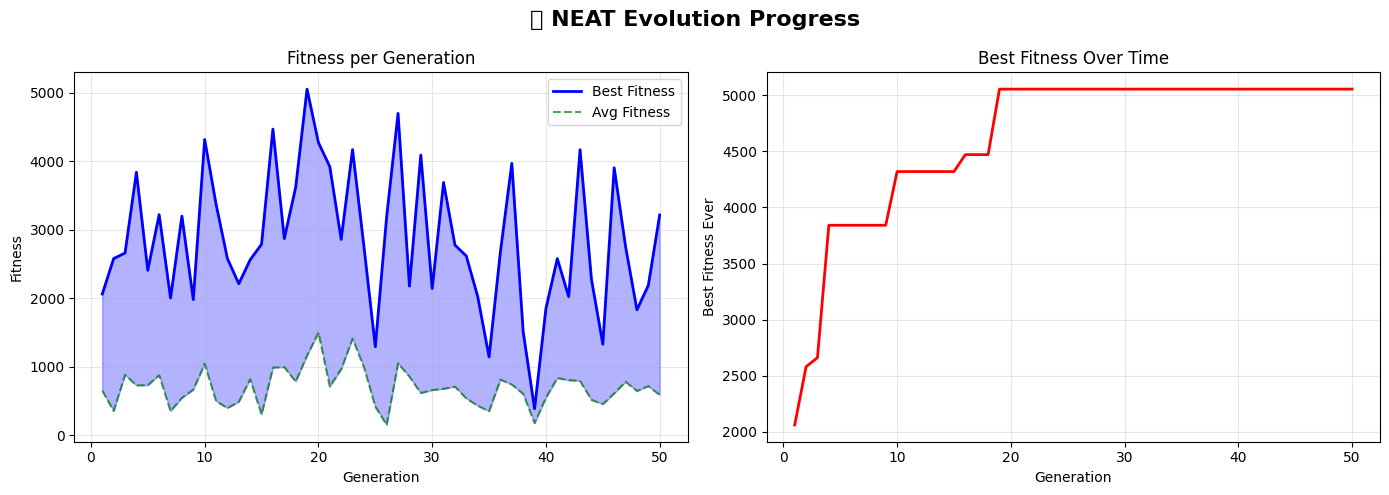

📊 Total Generations: 50
🏆 Best Fitness: 5054
📈 Average Final: 589
✓ Plot saved to plots_state/neat_evolution.png


In [4]:
# ═══════════════════════════════════════════════════════════════════════════════
# 6. 📊 TRAINING PROGRESS PLOT
# ═══════════════════════════════════════════════════════════════════════════════

# Load stats
try:
    with open('models_state/neat_stats.pkl', 'rb') as f:
        stats = pickle.load(f)
    best_scores = stats['best_scores']
    avg_scores = stats['avg_scores']
    total_gens = stats.get('generations', len(best_scores))
except FileNotFoundError:
    print("❌ No stats file found! Run training first.")
    best_scores, avg_scores = [], []

if best_scores:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle('🧬 NEAT Evolution Progress', fontsize=16, fontweight='bold')
    
    generations = range(1, len(best_scores) + 1)
    
    # Left: Fitness per generation
    axes[0].plot(generations, best_scores, 'b-', lw=2, label='Best Fitness')
    axes[0].plot(generations, avg_scores, 'g--', alpha=0.7, label='Avg Fitness')
    axes[0].fill_between(generations, avg_scores, best_scores, alpha=0.3, color='blue')
    axes[0].set_xlabel('Generation')
    axes[0].set_ylabel('Fitness')
    axes[0].set_title('Fitness per Generation')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Right: Best fitness over time
    cumulative_best = np.maximum.accumulate(best_scores)
    axes[1].plot(generations, cumulative_best, 'r-', lw=2)
    axes[1].set_xlabel('Generation')
    axes[1].set_ylabel('Best Fitness Ever')
    axes[1].set_title('Best Fitness Over Time')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('plots_state/neat_evolution.png', dpi=150)
    plt.show()
    
    print(f"📊 Total Generations: {total_gens}")
    print(f"🏆 Best Fitness: {max(best_scores):.0f}")
    print(f"📈 Average Final: {avg_scores[-1]:.0f}")
    print("✓ Plot saved to plots_state/neat_evolution.png")

# ═══════════════════════════════════════════════════════════════════════════════
# 6b. 🎮 TEST THE WINNER
# ═══════════════════════════════════════════════════════════════════════════════

# Load config
config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    "neat_config.txt"
)

# Load winner
try:
    with open('models_state/neat_winner.pkl', 'rb') as f:
        winner = pickle.load(f)
except FileNotFoundError:
    print("❌ No winner found! Run training first.")
    winner = None

if winner:
    print("🎮 Testing Winner")
    print("="*50)
    print(f"   Fitness: {winner.fitness:.0f}")
    print(f"   Nodes: {len(winner.nodes)}")
    print(f"   Connections: {len([c for c in winner.connections.values() if c.enabled])}")
    
    print("\n🦖 Watch the evolved Dino play 5 games!")
    tester = NEATVisualTester(winner, config)
    test_scores = tester.run(num_games=5)
    
    print(f"\n📊 Test Results:")
    print(f"   Average: {np.mean(test_scores):.0f}")
    print(f"   Best:    {max(test_scores)}")
    print(f"   Worst:   {min(test_scores)}")

## 7. 🧬 Network Topology Visualization

🔍 DEBUG: Connection structure
   Enabled connections: 4
   -1 → 0 (weight: -4.24)
   -3 → 1 (weight: -0.49)
   -5 → 0 (weight: -5.58)
   -11 → 0 (weight: 3.42)

   Output node keys: [0, 1]

🧬 Network: 12 → 0 → 2 | 4 connections | Fitness: 5054
   Drew 4/4 connections


C:\Users\IC1807\AppData\Local\Temp\ipykernel_40128\1044090559.py:107: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\IC1807\AppData\Local\Temp\ipykernel_40128\1044090559.py:107: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\IC1807\AppData\Local\Temp\ipykernel_40128\1044090559.py:107: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\IC1807\AppData\Local\Temp\ipykernel_40128\1044090559.py:107: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\IC1807\AppData\Local\Temp\ipykernel_40128\1044090559.py:108: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.savefig('plots_state/neat_network_topology.png', dpi=150, bbox_inches='tight')
C:\Users\IC1807\AppData\Local\Temp\ipykernel_40128\104409055

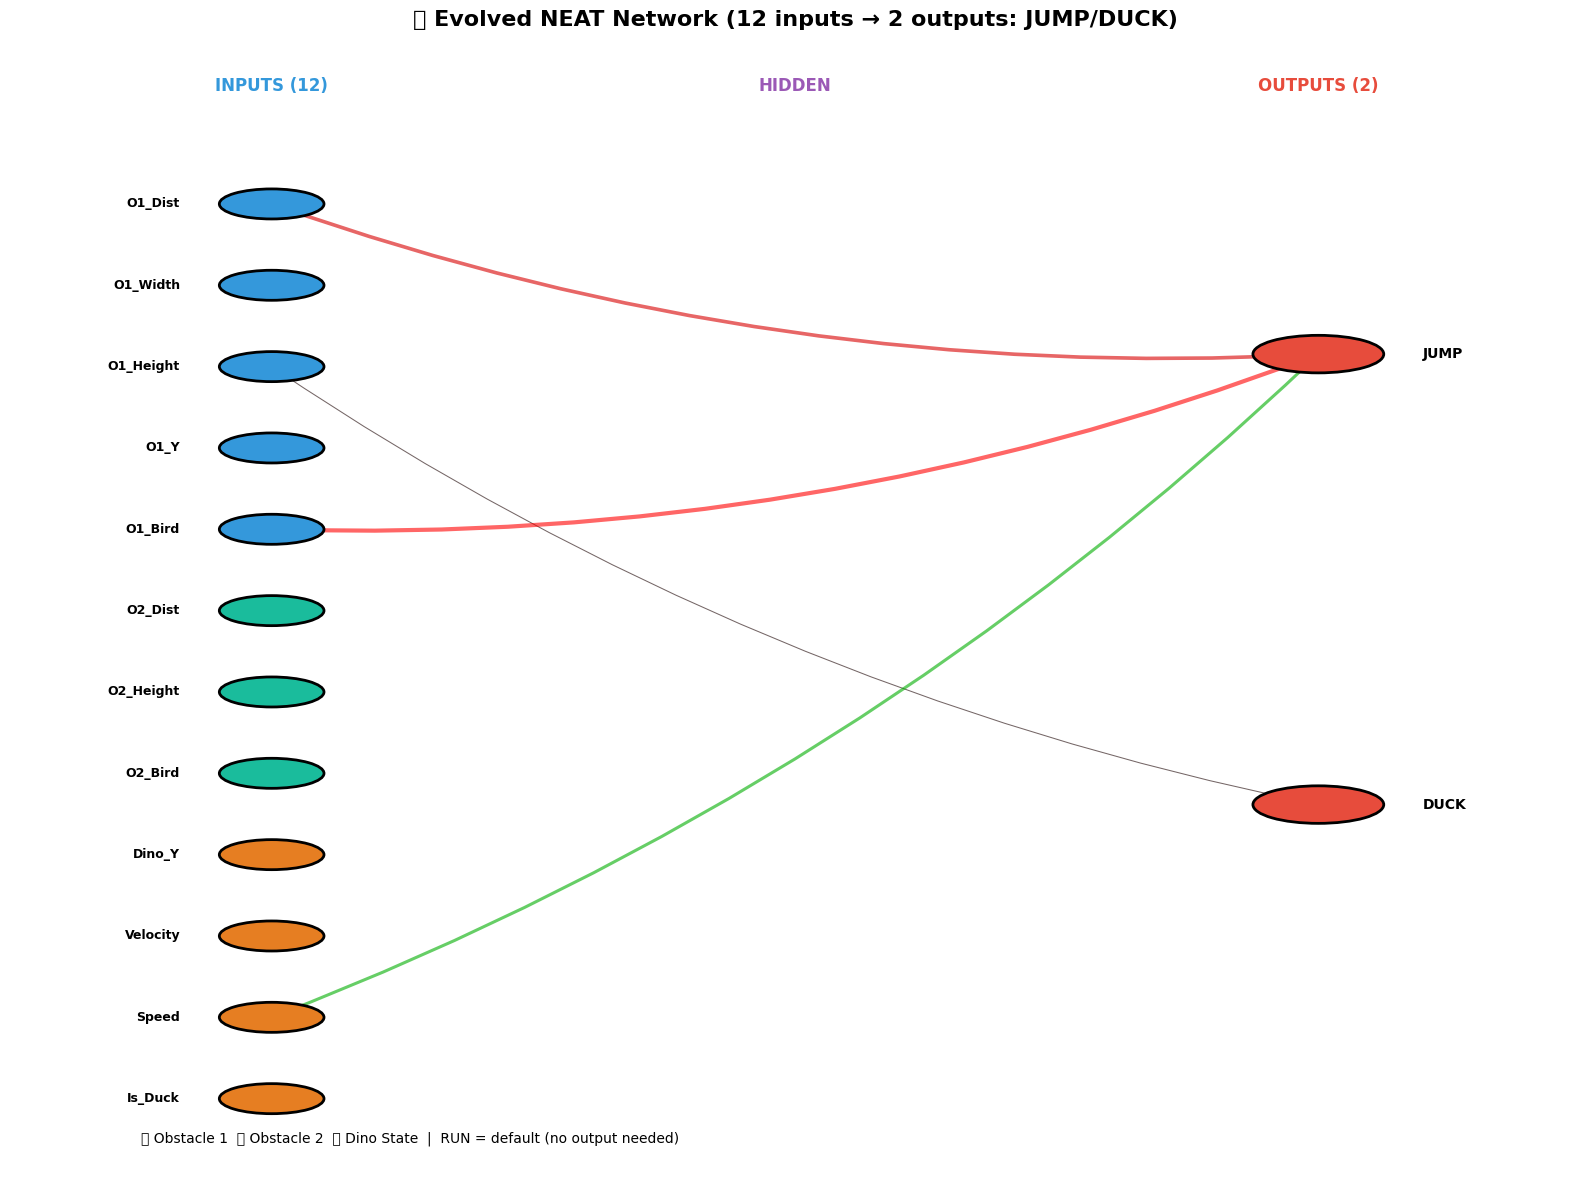

In [6]:
# ═══════════════════════════════════════════════════════════════════════════════
# 7. 🧬 NETWORK TOPOLOGY VISUALIZATION
# ═══════════════════════════════════════════════════════════════════════════════

try:
    with open('models_state/neat_winner.pkl', 'rb') as f:
        winner = pickle.load(f)
except FileNotFoundError:
    print("❌ No winner found!")
    winner = None

if winner:
    # Debug: Print actual connection keys to understand structure
    print("🔍 DEBUG: Connection structure")
    enabled_connections = [(k, v) for k, v in winner.connections.items() if v.enabled]
    print(f"   Enabled connections: {len(enabled_connections)}")
    for (i_n, o_n), conn in enabled_connections[:10]:  # Show first 10
        print(f"   {i_n} → {o_n} (weight: {conn.weight:.2f})")
    
    print(f"\n   Output node keys: {list(winner.nodes.keys())}")
    
    # NEAT uses -1 to -N for inputs (not -N to -1)
    # Input -1 = first input, -2 = second input, etc.
    input_keys = list(range(-1, -13, -1))  # [-1, -2, -3, ..., -12]
    output_keys = [0, 1]  # Only 2 outputs now: JUMP, DUCK
    input_names = ['O1_Dist', 'O1_Width', 'O1_Height', 'O1_Y', 'O1_Bird',  # Obstacle 1
                   'O2_Dist', 'O2_Height', 'O2_Bird',                       # Obstacle 2
                   'Dino_Y', 'Velocity', 'Speed', 'Is_Duck']               # Dino state
    output_names = ['JUMP', 'DUCK']  # RUN is automatic (default)
    
    hidden_keys = [k for k in winner.nodes.keys() if k not in output_keys]
    hidden_count = len(hidden_keys)
    
    print(f"\n🧬 Network: 12 → {hidden_count} → 2 | {len(enabled_connections)} connections | Fitness: {winner.fitness:.0f}")
    
    fig_height = max(12, 2 + hidden_count * 0.4)
    fig, ax = plt.subplots(1, 1, figsize=(16, fig_height))
    max_y = max(12, hidden_count) + 1
    ax.set_xlim(-1, 5); ax.set_ylim(-1, max_y + 1); ax.axis('off')
    ax.set_title('🧬 Evolved NEAT Network (12 inputs → 2 outputs: JUMP/DUCK)', fontsize=16, fontweight='bold', pad=20)
    
    # Position all nodes
    node_positions = {}
    
    # Input nodes (y positions spaced evenly)
    for i, key in enumerate(input_keys):
        node_positions[key] = (0, max_y - 1 - i * (max_y / 12))
    
    # Hidden nodes
    if hidden_count > 0:
        if hidden_count <= 10:
            for i, key in enumerate(hidden_keys):
                node_positions[key] = (2, max_y - 1 - i * (max_y / max(hidden_count, 1)))
        else:
            cols = 2 if hidden_count <= 20 else 3
            npc = (hidden_count + cols - 1) // cols
            for i, key in enumerate(hidden_keys):
                node_positions[key] = (1.5 + (i // npc) * 0.8, max_y - 1 - (i % npc) * (max_y / npc))
    
    # Output nodes (2 outputs now)
    for i, key in enumerate(output_keys):
        node_positions[key] = (4, max_y - 3 - i * 6)  # Spaced for 2 outputs
    
    # Draw connections
    drawn_count = 0
    for (i_n, o_n), conn in enabled_connections:
        if i_n in node_positions and o_n in node_positions:
            x1, y1 = node_positions[i_n]
            x2, y2 = node_positions[o_n]
            w = conn.weight
            c = (0, min(1, abs(w)/5), 0, 0.6) if w > 0 else (min(1, abs(w)/5), 0, 0, 0.6)
            ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                       arrowprops=dict(arrowstyle='->', color=c, lw=min(3, 0.5 + abs(w) * 0.5), connectionstyle='arc3,rad=0.1'))
            drawn_count += 1
    
    print(f"   Drew {drawn_count}/{len(enabled_connections)} connections")
    
    # Draw input nodes
    for i, key in enumerate(input_keys):
        x, y = node_positions[key]
        if i < 5:
            color = '#3498db'  # Blue - Obstacle 1
        elif i < 8:
            color = '#1abc9c'  # Teal - Obstacle 2
        else:
            color = '#e67e22'  # Orange - Dino state
        ax.add_patch(plt.Circle((x, y), 0.2, color=color, ec='black', lw=2, zorder=5))
        ax.text(x - 0.35, y, input_names[i], ha='right', va='center', fontsize=9, fontweight='bold')
    
    # Draw hidden nodes
    for key in hidden_keys:
        x, y = node_positions[key]
        ax.add_patch(plt.Circle((x, y), 0.18, color='#9b59b6', ec='black', lw=1.5, zorder=5))
        ax.text(x, y, str(key), ha='center', va='center', fontsize=7, color='white')
    
    # Draw output nodes
    for i, key in enumerate(output_keys):
        x, y = node_positions[key]
        ax.add_patch(plt.Circle((x, y), 0.25, color='#e74c3c', ec='black', lw=2, zorder=5))
        ax.text(x + 0.4, y, output_names[i], ha='left', va='center', fontsize=10, fontweight='bold')
    
    ax.text(0, max_y + 0.5, 'INPUTS (12)', ha='center', fontsize=12, fontweight='bold', color='#3498db')
    ax.text(2, max_y + 0.5, 'HIDDEN', ha='center', fontsize=12, fontweight='bold', color='#9b59b6')
    ax.text(4, max_y + 0.5, 'OUTPUTS (2)', ha='center', fontsize=12, fontweight='bold', color='#e74c3c')
    ax.text(-0.5, -0.5, '🔵 Obstacle 1  🟢 Obstacle 2  🟠 Dino State  |  RUN = default (no output needed)', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('plots_state/neat_network_topology.png', dpi=150, bbox_inches='tight')
    plt.show()